In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [2]:
DATA_PATH: str = r"../data/planeta_salud_wellbeing_dataset.csv"
df = pd.read_csv(DATA_PATH)

In [13]:
df.sample(5)

,ciudad,semana,satisfaccion_transporte,espacios_verdes,seguridad_percibida,nivel_estres,actividad_fisica_semanal_horas,calidad_aire,nivel_ruido_db
25,Quito,2,3,3.14,3,3.5,9.0,58,63
35,Asunción,4,5,0.56,1,7.6,6.6,69,74
45,Panamá,2,1,0.93,1,6.3,7.5,67,53
40,San José,1,4,4.67,4,1.8,6.5,42,86
15,Santiago,4,2,2.28,2,9.7,5.6,39,84


## Selección efectiva de tipos de gráficas


### Barras: Ciudad x satisfaccion con transporte

In [71]:
transport_df = (
    df
    .groupby("ciudad", as_index=False)["satisfaccion_transporte"].mean()
    .sort_values("satisfaccion_transporte", ascending=False)
)

fig = px.bar(
    transport_df,
    x="ciudad",
    y="satisfaccion_transporte",
    labels={"satisfaccion_transporte": "Satisfacción promedio", "ciudad": "Ciudad"},
    title = "Buenos Aires lidera la lista de ciudades donde sus habitantes se<br>sienten más complacidos con el servicio de Transporte Público"
)

fig.add_annotation(
    text="Información tomada de planeta_salud_wellbeing_dataset.csv",
    xref="paper", yref="paper",
    x=0, y=-0.4,  
    showarrow=False,
    font=dict(size=12, color="gray"),
    align="left"
)

fig.update_traces(textposition="outside")  # mostrar texto fuera de las barras
fig.show()

### Scatter Plot: Espacios verdes x nivel de estrés 

In [89]:
stres_df = df.groupby("ciudad", as_index=False)[["espacios_verdes", "nivel_estres"]].mean()

fig = px.scatter(
    stres_df,
    x="espacios_verdes",
    y="nivel_estres",
    title="Santiago es la ciudad con el promedio de estrés mas elevado teniendo un area de espacios verdes moderada.",
    labels={
        "espacios_verdes": "Espacios verdes (m²)",
        "nivel_estres": "Nivel promedio de estrés"
    },
    hover_data=["ciudad", "espacios_verdes", "nivel_estres"],
    text="ciudad"
)

fig.update_traces(
    textposition="bottom center",
)  # etiquetas de texto debajo de cada punto

fig.add_annotation(
    text="Información tomada de planeta_salud_wellbeing_dataset.csv",
    xref="paper", yref="paper",
    x=0, y=-0.2,  
    showarrow=False,
    font=dict(size=12, color="gray"),
    align="left"
)

fig.show()

### Histograma de calidad de aire

In [110]:
fig = px.histogram(
    df,
    x="calidad_aire",
    title="Distribución de la calidad del aire (AQI)",
    labels={
        "calidad_aire": "Intervalos de calidad del aire (AQI)",
    },
    color_discrete_sequence=["#009688"],
)

fig.update_layout(
    yaxis_title="Cantidad de registros"  # 👈 Título personalizado del eje Y
)

fig.add_annotation(
    text="Información tomada de planeta_salud_wellbeing_dataset.csv",
    xref="paper", yref="paper",
    x=0, y=-0.25,  
    showarrow=False,
    font=dict(size=12, color="gray"),
    align="left"
)

fig.update_layout(bargap=0.1)

fig.show()

<Axes: ylabel='Frequency'>

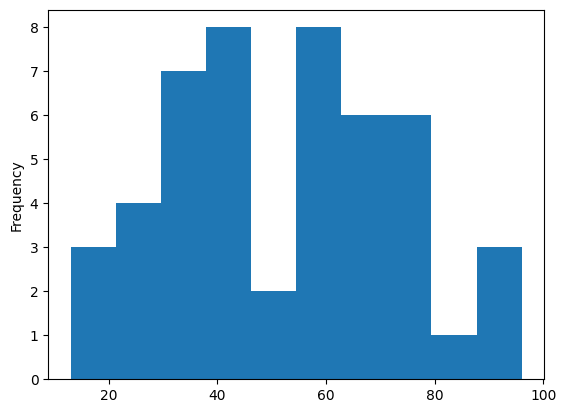

In [ ]:
df["calidad_aire"].plot(kind="hist")

### TreeMap

In [46]:
security_df = df.groupby("ciudad", as_index=False)["seguridad_percibida"].mean()

fig = px.treemap(
    security_df,
    path=["ciudad"],
    values="seguridad_percibida",
    color="seguridad_percibida",
    color_continuous_scale='Blues',
    title="Ciudad de México es la ciudad en la cual<br>sus habitantes se sienten mas seguros."
)

fig.update_layout(
    height=700,
    width=700
)  # graficar de forma vertical 

fig.update_coloraxes(colorbar_title="Seguridad percibida (%)")

fig.show()

## Combinar texto y visualización: uso de títulos, subtítulos y anotaciones efectivas

In [11]:
stres_df = df.groupby("ciudad", as_index=False)[["espacios_verdes", "nivel_estres"]].mean()

fig = px.scatter(
    stres_df,
    x="espacios_verdes",
    y="nivel_estres",
    title="Menos espacio verde, más estrés: una relación visible en las ciudades del sur",
    hover_data=['ciudad', 'espacios_verdes', 'nivel_estres'],
    color="ciudad"
)

fig.add_annotation(
    hovertext="Caracas presenta un nivel alto de estrés a pesar de un nivel medio de áreas verdes.",
    x=3.095,
    y=5.875,
    bgcolor="white",
    bordercolor="black",
    borderwidth=1,
)  # añadir comentario como tooltip